https://www.tensorflow.org/tutorials/keras/classification?hl=ja

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

train_images = train_images / 255.0
test_images = test_images / 255.0

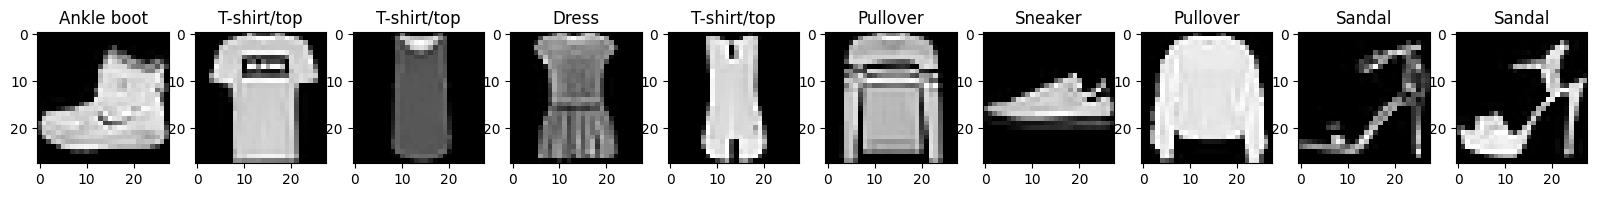

In [36]:
fig, axs = plt.subplots(1, 10, figsize=(20, 3))
for i, ax in zip(range(10), axs):
    ax.imshow(train_images[i], cmap="gray")
    ax.set_title(f'{class_names[train_labels[i]]}')

In [116]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
    ])

# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=5, verbose=1)

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7828 - loss: 0.6248
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8614 - loss: 0.3845
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8752 - loss: 0.3393
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8833 - loss: 0.3199
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8910 - loss: 0.2976


In [117]:
predictions = model.predict(test_images, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [118]:
df = pd.DataFrame(predictions)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,2.340349e-09,3.830617e-08,1.085373e-07,1.786486e-07,4.517316e-08,1.161229e-02,1.669330e-06,5.175337e-02,1.844063e-05,9.366139e-01
1,5.070731e-06,3.316706e-10,9.753294e-01,2.058766e-09,2.331563e-02,3.051586e-09,1.349521e-03,6.114102e-17,3.905856e-07,2.829665e-14
2,2.298417e-05,9.999752e-01,1.049643e-08,1.071848e-06,6.831097e-07,2.827029e-12,7.747534e-08,1.990060e-17,1.537028e-09,6.343196e-13
3,9.434973e-06,9.999644e-01,6.348553e-08,2.469361e-05,1.116691e-06,3.891232e-10,3.267303e-07,2.917407e-14,4.587293e-10,5.636032e-11
4,1.409819e-01,4.688960e-06,1.374857e-02,1.980179e-03,5.709733e-03,1.795548e-05,8.374491e-01,2.927670e-07,1.046888e-04,2.994416e-06


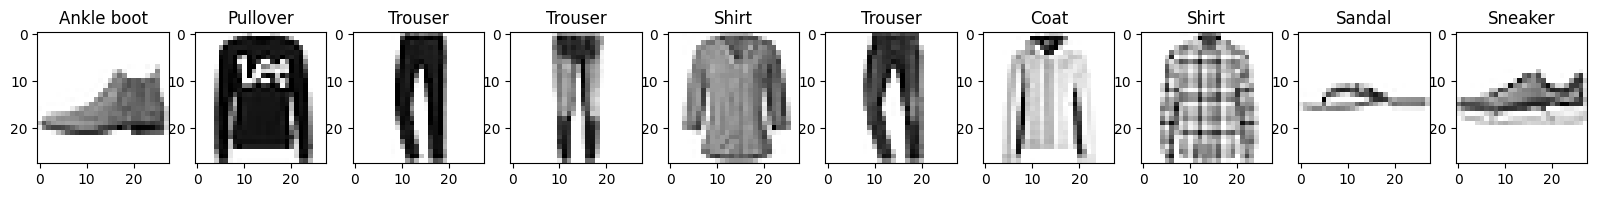

In [119]:
fig, axs = plt.subplots(1, 10, figsize=(20, 3))
for i, ax in zip(range(10), axs):
    ax.imshow(test_images[i], cmap=plt.cm.binary)
    ax.set_title(f'{class_names[test_labels[i]]}')
plt.show()

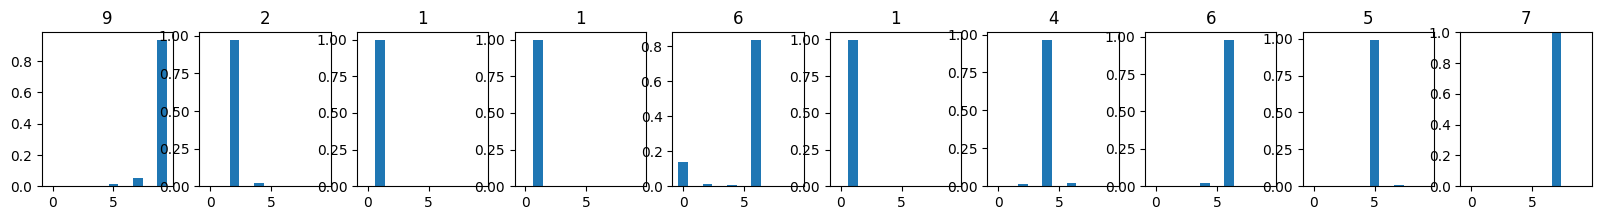

In [120]:
fig, axs = plt.subplots(1, 10, figsize=(20, 2))
plt.ylim([0, 1])
for i, ax in enumerate(axs):
    pred = df.iloc[i].idxmax()
    ax.bar(range(10), df.iloc[i])
    ax.set_title(f'{pred}')
plt.show()